# Basic example for using AeroMAPS with Jupyter Notebook

This document represents both an example and a tutorial for using the basic functions of AeroMAPS to simulate and evaluate a transition scenario for the aviation sector.  It is written in the form of a Jupyter Notebook to facilitate its use. The user will be able to adapt this notebook and couple it with other notebooks proposed in the documentation.

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps.core.process import AeromapsProcess
from aeromaps.core.models import models_simple

In [2]:
process = AeromapsProcess(read_json=True, models=models_simple)

## Set up variables

The user can then set the different parameters of the model to generate its scenario. The list of the float inputs can be displayed using this command.

 In the following, some main parameters are for instance set up.

In [3]:
# Air traffic evolution

## Growth rate by category and decade [%]
process.parameters.growth_rate_2020_2030_short_range = 2
process.parameters.growth_rate_2030_2040_short_range = 2
process.parameters.growth_rate_2040_2050_short_range = 2
process.parameters.growth_rate_2020_2030_medium_range = 2
process.parameters.growth_rate_2030_2040_medium_range = 2
process.parameters.growth_rate_2040_2050_medium_range = 2
process.parameters.growth_rate_2020_2030_long_range = 2
process.parameters.growth_rate_2030_2040_long_range = 2
process.parameters.growth_rate_2040_2050_long_range = 2
process.parameters.growth_rate_2020_2030_freight = 2
process.parameters.growth_rate_2030_2040_freight = 2
process.parameters.growth_rate_2040_2050_freight = 2

In [4]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [5]:
# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process.parameters.energy_per_ask_short_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain = 1.5
process.parameters.energy_per_ask_long_range_dropin_fuel_gain = 1.5

## Hydrogen aircraft
### Values for setting logistic functions by category
process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2035
process.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range = 1.0

In [6]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [7]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_2030 = 4.8
process.parameters.biofuel_share_2040 = 24.0
process.parameters.biofuel_share_2050 = 35.0
process.parameters.electrofuel_share_2030 = 1.2
process.parameters.electrofuel_share_2040 = 10.0
process.parameters.electrofuel_share_2050 = 35.0

In [8]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 200.0

In [9]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

In [10]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_2030 = 0.7
process.parameters.biofuel_hefa_fog_share_2040 = 0.7
process.parameters.biofuel_hefa_fog_share_2050 = 0.7
process.parameters.biofuel_hefa_others_share_2030 = 3.8
process.parameters.biofuel_hefa_others_share_2040 = 3.8
process.parameters.biofuel_hefa_others_share_2050 = 3.8
process.parameters.biofuel_ft_others_share_2030 = 76.3
process.parameters.biofuel_ft_others_share_2040 = 76.3
process.parameters.biofuel_ft_others_share_2050 = 76.3
process.parameters.biofuel_ft_msw_share_2030 = 7.4
process.parameters.biofuel_ft_msw_share_2040 = 7.4
process.parameters.biofuel_ft_msw_share_2050 = 7.4

## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 200
process.parameters.electricity_emission_factor_2040 = 100
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2030 = 10
process.parameters.hydrogen_electrolysis_share_2040 = 50
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2030 = 60
process.parameters.hydrogen_gas_ccs_share_2040 = 40
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 10
process.parameters.hydrogen_coal_ccs_share_2040 = 5
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2030 = 20
process.parameters.hydrogen_gas_share_2040 = 5
process.parameters.hydrogen_gas_share_2050 = 0

In [11]:
# Set the cost parameters 

#  TODO 
process.parameters.co2_tax_2020: float = 54
process.parameters.co2_tax_2030: float = 250
process.parameters.co2_tax_2040: float = 500
process.parameters.co2_tax_2050: float = 775

## Compute

Once all the parameters have been set up, the user can compute.

In [12]:
process.compute()

## Results

The user can then display the results. The user has access to float outputs but also to annual data outputs, with the possibility of choosing the output.

In [13]:
process.data["vector_outputs"]

,abatement_effective_atj,abatement_effective_electrofuel,abatement_effective_ft_msw,abatement_effective_ft_others,abatement_effective_hefa_fog,abatement_effective_hefa_others,abatement_effective_hydrogen_electrolysis,abatement_potential_atj,abatement_potential_electrofuel,abatement_potential_ft_msw,abatement_potential_ft_others,abatement_potential_hefa_fog,abatement_potential_hefa_others,abatement_potential_hydrogen_electrolysis,aerosol_erf,annual_co2_erf,ask,ask_long_range,ask_long_range_dropin_fuel,ask_long_range_dropin_fuel_share,ask_long_range_hydrogen,ask_long_range_hydrogen_share,ask_medium_range,ask_medium_range_dropin_fuel,ask_medium_range_dropin_fuel_share,ask_medium_range_hydrogen,ask_medium_range_hydrogen_share,ask_short_range,ask_short_range_dropin_fuel,ask_short_range_dropin_fuel_share,ask_short_range_hydrogen,ask_short_range_hydrogen_share,biofuel_atj_capex,biofuel_atj_efficiency,biofuel_atj_emission_factor,biofuel_atj_mfsp,biofuel_atj_share,biofuel_carbon_tax_atj,biofuel_carbon_tax_ft_msw,biofuel_carbon_tax_ft_others,biofuel_carbon_tax_hefa_fog,biofuel_carbon_tax_hefa_others,biofuel_cost_atj,biofuel_cost_ft_msw,biofuel_cost_ft_others,biofuel_cost_hefa_fog,biofuel_cost_hefa_others,biofuel_cost_premium_atj,biofuel_cost_premium_ft_msw,biofuel_cost_premium_ft_others,biofuel_cost_premium_hefa_fog,biofuel_cost_premium_hefa_others,biofuel_ft_efficiency,biofuel_ft_msw_capex,biofuel_ft_msw_emission_factor,biofuel_ft_msw_mfsp,biofuel_ft_msw_share,biofuel_ft_others_capex,biofuel_ft_others_emission_factor,biofuel_ft_others_mfsp,biofuel_ft_others_share,biofuel_hefa_fog_capex,biofuel_hefa_fog_emission_factor,biofuel_hefa_fog_mfsp,biofuel_hefa_fog_share,biofuel_hefa_fuel_efficiency,biofuel_hefa_oil_efficiency,biofuel_hefa_others_capex,biofuel_hefa_others_emission_factor,biofuel_hefa_others_mfsp,biofuel_hefa_others_share,biofuel_marginal_mfsp,biofuel_mean_capex,biofuel_mean_emission_factor,biofuel_mean_mfsp,...,hydrogen_coal_share,hydrogen_electrolysis_emission_factor,hydrogen_electrolysis_share,hydrogen_gas_ccs_share,hydrogen_gas_share,hydrogen_mean_emission_factor,kerosene_carbon_tax_BAU,kerosene_carbon_tax_cost,kerosene_cost,kerosene_emission_factor,kerosene_market_price,kerosene_price_supplement_carbon_tax,kerosene_share,liquefaction_efficiency,liquefaction_h2_capex_cost,liquefaction_h2_elec_cost,liquefaction_h2_opex_cost,liquefaction_h2_total_cost,liquefaction_plant_building_cost,liquefaction_plant_building_scenario,liquefier_eis_capex,load_factor,non_co2_equivalent_emissions,non_co2_erf_smooth,non_co2_erf_smooth_variation,non_discounted_BAU_energy_expenses,non_discounted_energy_cost_premium,non_discounted_energy_expenses,nox_emissions,nox_erf,operations_contrails_gain,operations_contrails_overconsumption,operations_gain,plant_building_cost_atj,plant_building_cost_ft_msw,plant_building_cost_ft_others,plant_building_cost_hefa_fog,plant_building_cost_hefa_others,plant_building_scenario_atj,plant_building_scenario_ft_msw,plant_building_scenario_ft_others,plant_building_scenario_hefa_fog,plant_building_scenario_hefa_others,plant_eis_capex,plant_eis_fixed_opex,plant_eis_var_opex,rpk,rpk_long_range,rpk_long_range_measures_impact,rpk_medium_range,rpk_medium_range_measures_impact,rpk_reference,rpk_short_range,rpk_short_range_measures_impact,rtk,rtk_dropin_fuel,rtk_dropin_fuel_share,rtk_hydrogen,rtk_hydrogen_share,rtk_reference,soot_emissions,soot_erf,sulfur_emissions,sulfur_erf,temperature_increase_from_aviation,temperature_increase_from_co2_from_aviation,temperature_increase_from_nonco2_from_aviation,total_aircraft_distance,total_co2_equivalent_emissions_ratio,total_equivalent_emissions,total_erf,total_erf_smooth,total_h2_capex,total_hydrogen_supply_cost,transport_h2_total_cost
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.519131,0.641157,4.286200e+12,1.615897e+12,1.615897e+12,100.0,0.0,0.0,1.504456e+12,1.504456e+12,100.0,0.0,0.0,1.165846e+12,1.165846e+12,100.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.00

The user can write the results to an Excel file with the following command.

## Plots

Lastly, the user can also plot different parameters based on a database of plots. The list of the available plots can be displayed using the following command.

In [14]:
process.list_available_plots()

['air_transport_co2_emissions',
 'air_transport_climate_impacts',
 'carbon_budget_assessment',
 'equivalent_carbon_budget_assessment',
 'biomass_resource_budget_assessment',
 'electricity_resource_budget_assessment',
 'multidisciplinary_assessment',
 'temperature_increase_from_air_transport',
 'biomass_consumption',
 'electricity_consumption',
 'co2_per_rpk',
 'co2_per_rtk',
 'passenger_kaya_factors',
 'freight_kaya_factors',
 'levers_of_action_distribution',
 'revenue_passenger_kilometer',
 'revenue_tonne_kilometer',
 'available_seat_kilometer',
 'total_aircraft_distance',
 'load_factor',
 'energy_per_ask',
 'energy_per_rtk',
 'energy_consumption',
 'fuel_consumption_liter_per_pax_100km',
 'mean_fuel_emission_factor',
 'emission_factor_per_fuel',
 'cumulative_co2_emissions',
 'direct_h2o_emissions',
 'direct_nox_emissions',
 'direct_sulfur_emissions',
 'direct_soot_emissions',
 'equivalent_emissions',
 'cumulative_equivalent_emissions',
 'equivalent_emissions_ratio',
 'final_effective

The user can thus display a figure of this list, for instance the CO<sub>2</sub> emissions of the simulated scenario.

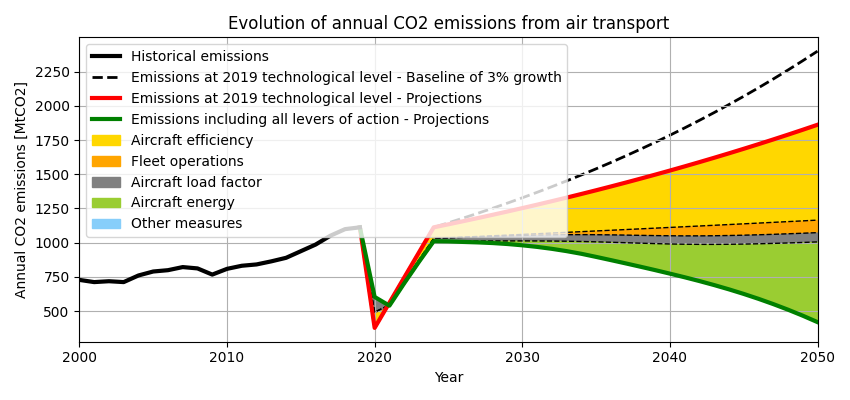

In [15]:
process.plot("air_transport_co2_emissions")

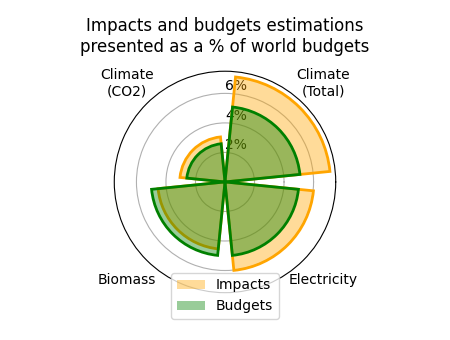

In [16]:
process.plot("multidisciplinary_assessment")

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\plots\costs.py:913: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  self.macc_curve = self.ax.step(np.cumsum(widths_potential) - widths_potential, heights, 'g', where='post', color="#335C67",


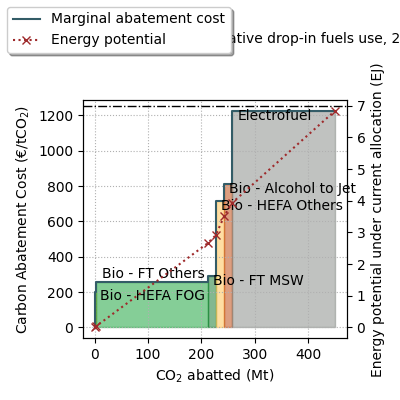

In [17]:
process.plot("drop_in_macc_curve")